# Fiber Bundles: A Computational Introduction

## 1. Introduction and Motivation

Fiber bundles are fundamental structures in modern geometry and physics, providing the mathematical framework for gauge theories, general relativity, and the study of topological invariants. A fiber bundle captures the idea of attaching a "fiber" space to each point of a "base" space in a locally consistent manner.

### Definition

A **fiber bundle** is a tuple $(E, B, \pi, F)$ where:
- $E$ is the **total space**
- $B$ is the **base space**
- $F$ is the **fiber**
- $\pi: E \to B$ is a continuous surjection called the **projection map**

The key property is **local triviality**: for each point $b \in B$, there exists an open neighborhood $U \ni b$ and a homeomorphism
$$\phi: \pi^{-1}(U) \to U \times F$$
such that the diagram commutes:
$$\pi = \text{pr}_1 \circ \phi$$
where $\text{pr}_1: U \times F \to U$ is the projection onto the first factor.

### The Fiber Over a Point

For any $b \in B$, the **fiber over $b$** is:
$$F_b = \pi^{-1}(b) \cong F$$

## 2. Examples of Fiber Bundles

### 2.1 Trivial Bundle
The simplest example: $E = B \times F$ with $\pi(b, f) = b$. This is globally a product space.

### 2.2 The Möbius Strip
A non-trivial bundle over $S^1$ with fiber $[0,1]$. The total space is the Möbius strip, which cannot be written as $S^1 \times [0,1]$ globally.

### 2.3 The Tangent Bundle
For a manifold $M$, the tangent bundle $TM$ has:
- Base space: $M$
- Fiber over $p$: the tangent space $T_pM \cong \mathbb{R}^n$
- Total space: $TM = \bigsqcup_{p \in M} T_pM$

### 2.4 The Hopf Fibration
One of the most beautiful examples in topology:
$$S^1 \hookrightarrow S^3 \xrightarrow{\pi} S^2$$

Here $S^3 \subset \mathbb{C}^2$ is fibered over $S^2 \cong \mathbb{CP}^1$ with circles as fibers. The projection is given by:
$$\pi(z_1, z_2) = [z_1 : z_2] \in \mathbb{CP}^1$$
for $(z_1, z_2) \in S^3 \subset \mathbb{C}^2$ with $|z_1|^2 + |z_2|^2 = 1$.

## 3. Structure Groups and Principal Bundles

A fiber bundle often comes with a **structure group** $G$ acting on the fiber $F$. The **transition functions** between local trivializations take values in $G$:
$$g_{\alpha\beta}: U_\alpha \cap U_\beta \to G$$

A **principal $G$-bundle** is a fiber bundle where $F = G$ and $G$ acts on itself by left multiplication.

### Cocycle Condition
On triple overlaps $U_\alpha \cap U_\beta \cap U_\gamma$:
$$g_{\alpha\beta} \cdot g_{\beta\gamma} = g_{\alpha\gamma}$$

## 4. Computational Visualizations

We will visualize several fiber bundle examples computationally:
1. The trivial cylinder bundle over $S^1$
2. The Möbius strip as a non-trivial line bundle
3. The tangent bundle of $S^1$
4. The Hopf fibration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11

### 4.1 Trivial Cylinder Bundle

The cylinder $S^1 \times I$ is the trivial bundle over $S^1$ with fiber $I = [0,1]$. Every fiber is "upright" with consistent orientation.

In [2]:
def trivial_cylinder(theta, t):
    """
    Parametrization of the trivial cylinder bundle S^1 × I.
    
    Parameters:
    -----------
    theta : float or array
        Angle parameter for the base circle S^1, in [0, 2π]
    t : float or array
        Fiber coordinate in [0, 1]
    
    Returns:
    --------
    x, y, z : coordinates in R^3
    """
    R = 2  # Major radius
    x = R * np.cos(theta)
    y = R * np.sin(theta)
    z = t
    return x, y, z

# Generate mesh
theta_cyl = np.linspace(0, 2*np.pi, 100)
t_cyl = np.linspace(0, 1, 50)
THETA_CYL, T_CYL = np.meshgrid(theta_cyl, t_cyl)

X_cyl, Y_cyl, Z_cyl = trivial_cylinder(THETA_CYL, T_CYL)

print("Cylinder generated: trivial bundle S^1 × [0,1]")
print(f"Topology: The cylinder is globally homeomorphic to the product space.")

Cylinder generated: trivial bundle S^1 × [0,1]
Topology: The cylinder is globally homeomorphic to the product space.


### 4.2 The Möbius Strip: A Non-Trivial Bundle

The Möbius strip is the quintessential example of a **non-trivial fiber bundle**. It is a line bundle over $S^1$ that twists by $180°$ as we traverse the base circle.

**Parametrization:**
$$\begin{align}
x(\theta, s) &= \left(R + s\cos\frac{\theta}{2}\right)\cos\theta \\
y(\theta, s) &= \left(R + s\cos\frac{\theta}{2}\right)\sin\theta \\
z(\theta, s) &= s\sin\frac{\theta}{2}
\end{align}$$
where $\theta \in [0, 2\pi)$ parametrizes the base and $s \in [-w, w]$ parametrizes the fiber.

In [3]:
def mobius_strip(theta, s, R=2, w=0.5):
    """
    Parametrization of the Möbius strip.
    
    The half-twist in the fiber is encoded by the θ/2 terms.
    
    Parameters:
    -----------
    theta : angle parameter for base S^1
    s : fiber coordinate in [-w, w]
    R : major radius
    w : half-width of the strip
    """
    x = (R + s * np.cos(theta/2)) * np.cos(theta)
    y = (R + s * np.cos(theta/2)) * np.sin(theta)
    z = s * np.sin(theta/2)
    return x, y, z

# Generate Möbius strip mesh
theta_mob = np.linspace(0, 2*np.pi, 200)
s_mob = np.linspace(-0.5, 0.5, 50)
THETA_MOB, S_MOB = np.meshgrid(theta_mob, s_mob)

X_mob, Y_mob, Z_mob = mobius_strip(THETA_MOB, S_MOB)

print("Möbius strip generated: non-trivial line bundle over S^1")
print("Key property: The fiber twists by 180° around the loop.")
print("Consequence: Cannot be expressed as S^1 × I globally.")

Möbius strip generated: non-trivial line bundle over S^1
Key property: The fiber twists by 180° around the loop.
Consequence: Cannot be expressed as S^1 × I globally.


### 4.3 Tangent Bundle of $S^1$

The tangent bundle $TS^1$ assigns to each point on the circle its tangent line. Since $S^1$ is parallelizable, $TS^1 \cong S^1 \times \mathbb{R}$ (a cylinder extending infinitely in both directions).

For visualization, we show tangent vectors at various points.

In [4]:
def tangent_bundle_S1(n_points=16):
    """
    Visualize the tangent bundle of S^1.
    
    At each point p = (cos θ, sin θ), the tangent space is spanned by (-sin θ, cos θ).
    """
    theta = np.linspace(0, 2*np.pi, n_points, endpoint=False)
    
    # Base points on S^1
    px = np.cos(theta)
    py = np.sin(theta)
    
    # Tangent vectors (normalized)
    tx = -np.sin(theta)
    ty = np.cos(theta)
    
    return px, py, tx, ty, theta

px, py, tx, ty, theta_ts1 = tangent_bundle_S1(24)
print("Tangent bundle TS^1 data generated.")
print(f"Number of fibers visualized: {len(theta_ts1)}")

Tangent bundle TS^1 data generated.
Number of fibers visualized: 24


### 4.4 The Hopf Fibration

The **Hopf fibration** $\pi: S^3 \to S^2$ is perhaps the most celebrated fiber bundle in mathematics. Each point in $S^2$ corresponds to a great circle in $S^3$.

**Construction using complex coordinates:**

Points in $S^3 \subset \mathbb{C}^2$ satisfy $|z_1|^2 + |z_2|^2 = 1$. The Hopf map sends:
$$\pi(z_1, z_2) = (2\text{Re}(z_1\bar{z}_2), 2\text{Im}(z_1\bar{z}_2), |z_1|^2 - |z_2|^2) \in S^2$$

The fiber over a point is a circle—all $(z_1, z_2)$ related by $z_1 \to e^{i\phi}z_1, z_2 \to e^{i\phi}z_2$.

In [5]:
def hopf_fiber(theta_base, phi_base, n_fiber=100):
    """
    Generate a Hopf fiber over a point on S^2.
    
    Parameters:
    -----------
    theta_base, phi_base : spherical coordinates of base point on S^2
    n_fiber : number of points to sample on the fiber circle
    
    Returns:
    --------
    Coordinates in R^3 via stereographic projection from S^3
    """
    # Parametrize the fiber
    t = np.linspace(0, 2*np.pi, n_fiber)
    
    # Convert S^2 point to a reference point in S^3
    # Using the standard section: for (x,y,z) in S^2,
    # lift to (cos(θ/2), sin(θ/2)e^{iφ}) in S^3
    cos_half = np.cos(theta_base / 2)
    sin_half = np.sin(theta_base / 2)
    
    # The fiber is obtained by multiplying by e^{it}
    z1 = cos_half * np.exp(1j * t)
    z2 = sin_half * np.exp(1j * (phi_base + t))
    
    # Stereographic projection from S^3 to R^3
    # Project from (0,0,0,-1) in R^4
    x1, y1 = np.real(z1), np.imag(z1)
    x2, y2 = np.real(z2), np.imag(z2)
    
    # S^3 embedded in R^4: (x1, y1, x2, y2) with x1^2+y1^2+x2^2+y2^2=1
    # Stereographic projection to R^3
    denom = 1 - y2 + 1e-10  # Avoid division by zero
    X = x1 / denom
    Y = y1 / denom
    Z = x2 / denom
    
    return X, Y, Z

def generate_hopf_fibers(n_fibers=12):
    """
    Generate multiple Hopf fibers over a grid of points on S^2.
    """
    fibers = []
    colors = []
    
    # Sample points on S^2
    for i, theta in enumerate(np.linspace(0.2, np.pi-0.2, 4)):
        for j, phi in enumerate(np.linspace(0, 2*np.pi, n_fibers//4, endpoint=False)):
            X, Y, Z = hopf_fiber(theta, phi)
            fibers.append((X, Y, Z))
            colors.append(theta)  # Color by latitude
    
    return fibers, colors

hopf_fibers, hopf_colors = generate_hopf_fibers(16)
print(f"Generated {len(hopf_fibers)} Hopf fibers.")
print("Each fiber is a circle (S^1) living in S^3, projected to R^3.")

Generated 16 Hopf fibers.
Each fiber is a circle (S^1) living in S^3, projected to R^3.


## 5. Visualization

We now create a comprehensive visualization showing all four examples.

/tmp/ipykernel_154427/2487894183.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')


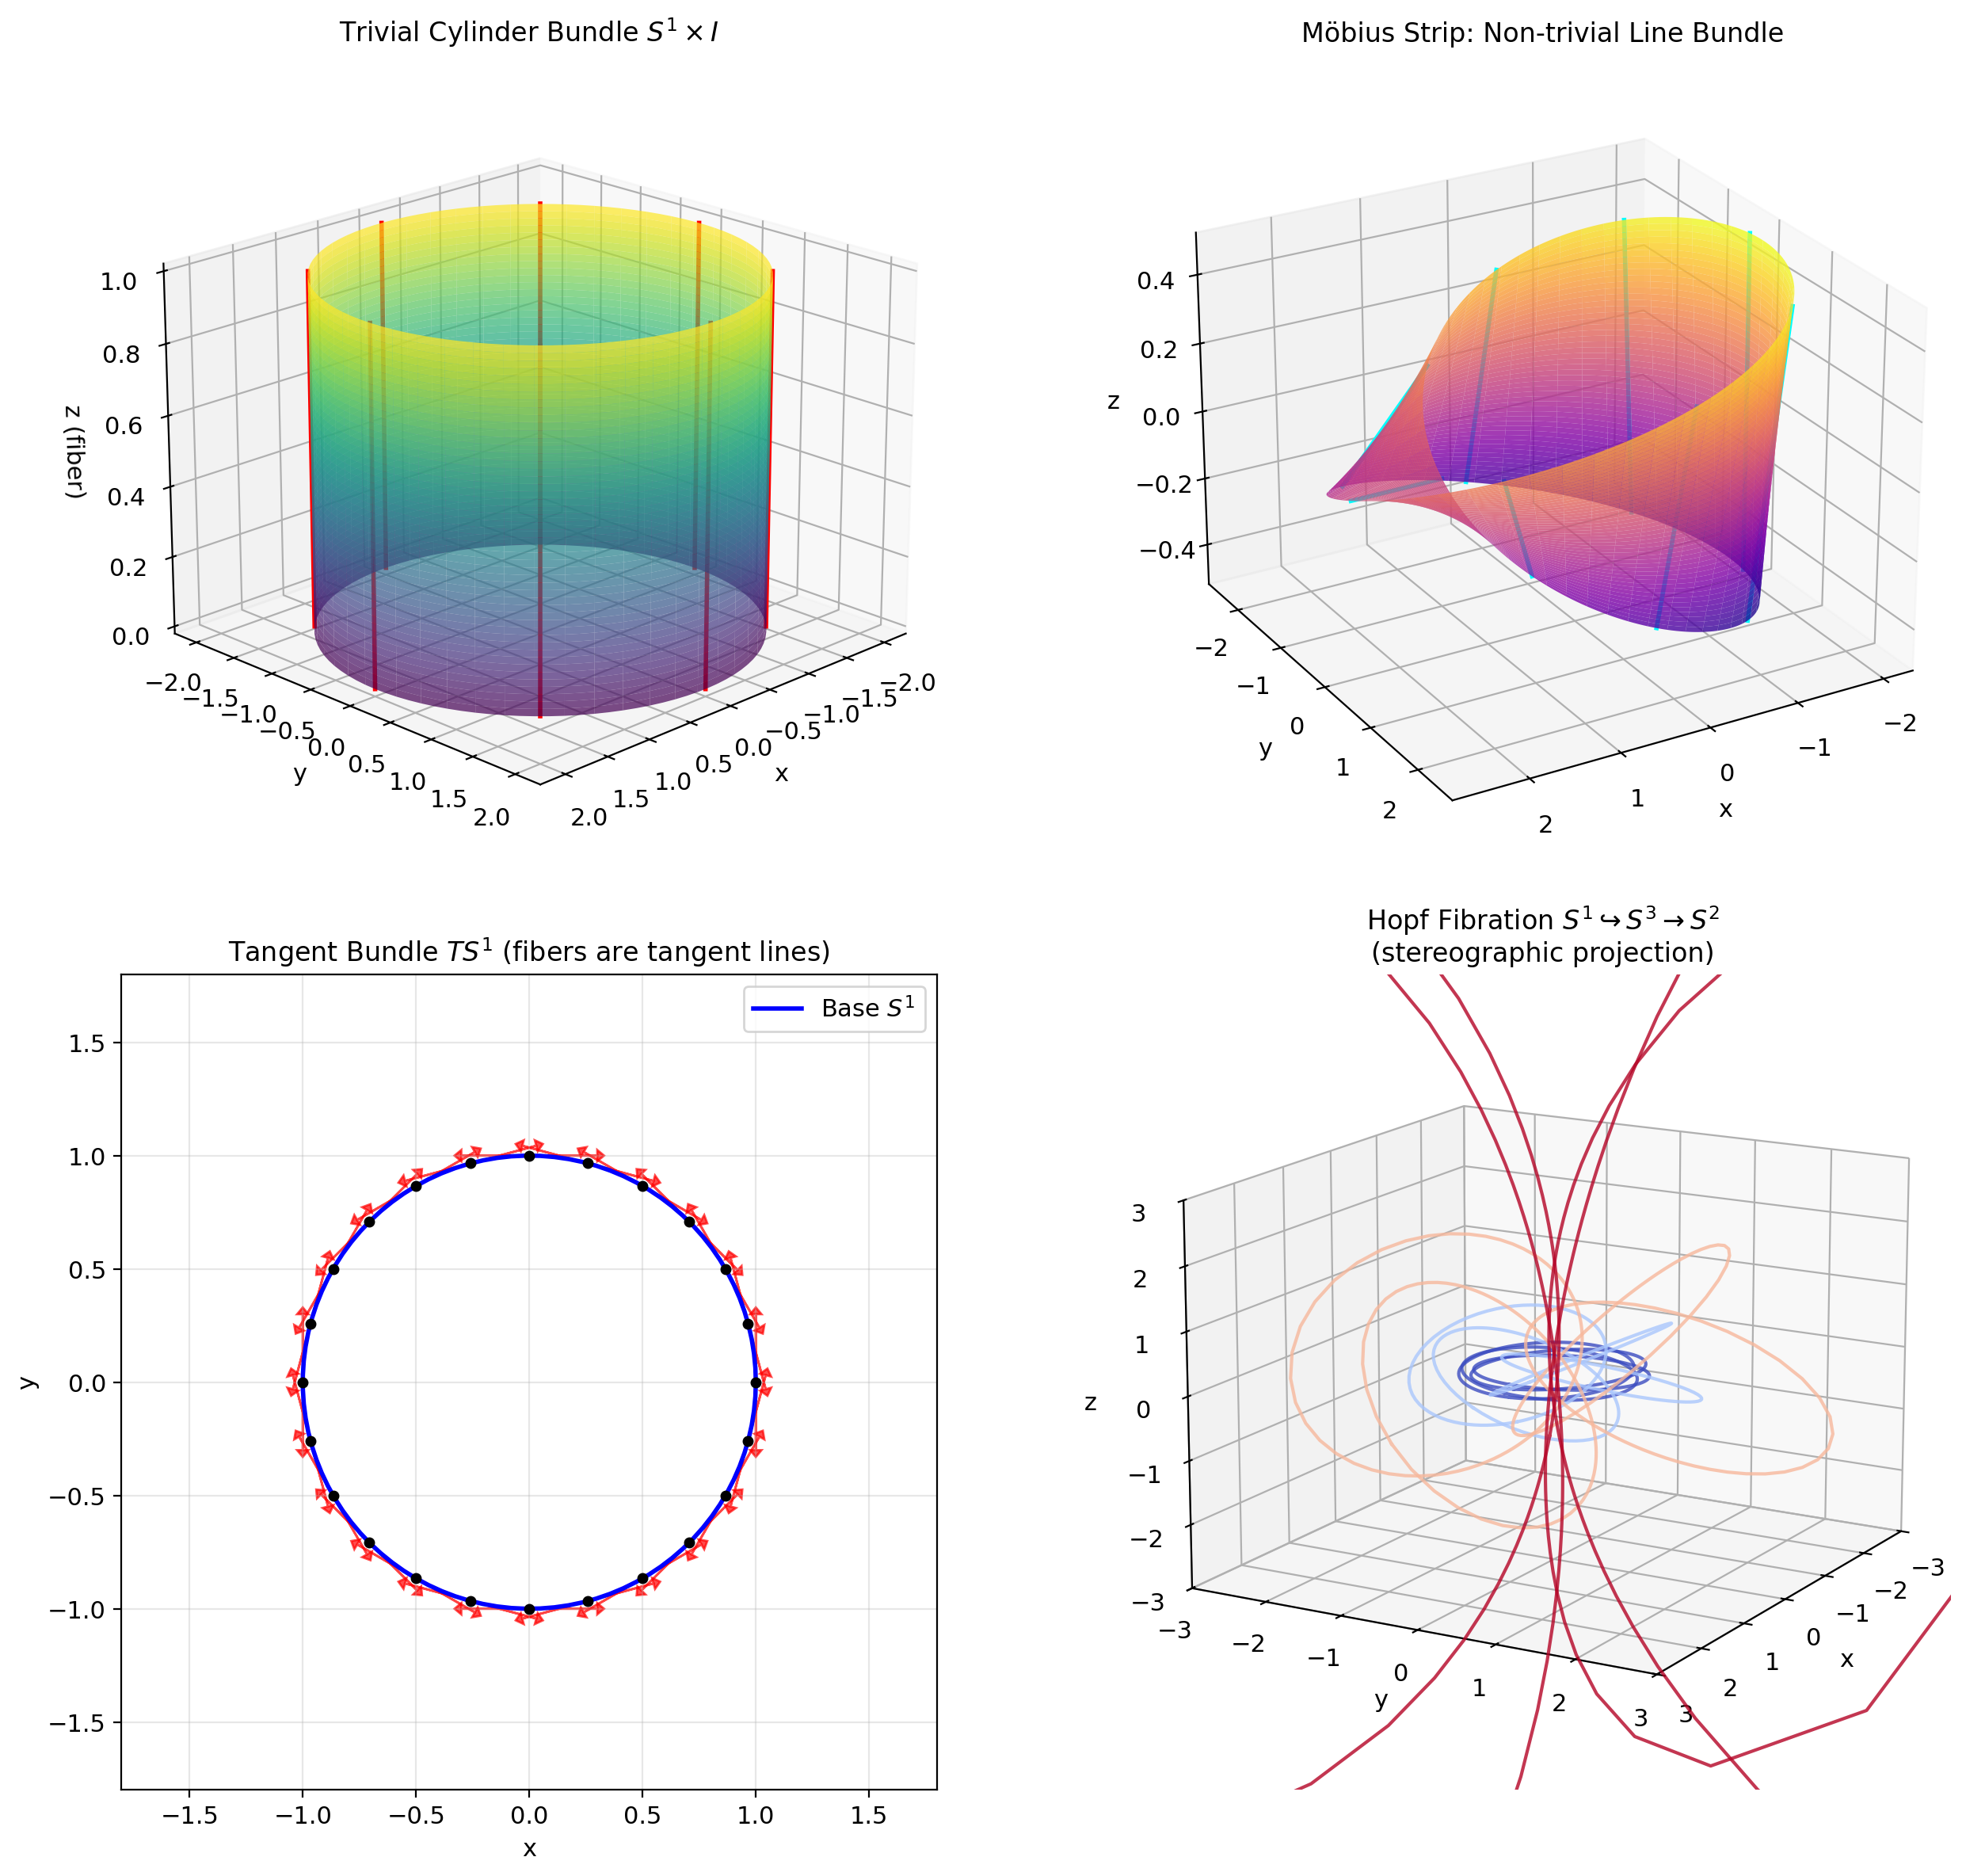


Figure saved to plot.png


In [6]:
fig = plt.figure(figsize=(14, 12))

# 1. Trivial Cylinder Bundle
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot_surface(X_cyl, Y_cyl, Z_cyl, cmap=cm.viridis, alpha=0.7, edgecolor='none')

# Highlight some fibers
for th in np.linspace(0, 2*np.pi, 8, endpoint=False):
    x_fib, y_fib, z_fib = trivial_cylinder(th, t_cyl)
    ax1.plot(x_fib, y_fib, z_fib, 'r-', linewidth=2)

ax1.set_title('Trivial Cylinder Bundle $S^1 \\times I$', fontsize=12)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z (fiber)')
ax1.view_init(elev=20, azim=45)

# 2. Möbius Strip (Non-trivial Bundle)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot_surface(X_mob, Y_mob, Z_mob, cmap=cm.plasma, alpha=0.8, edgecolor='none')

# Highlight some fibers
for th in np.linspace(0, 2*np.pi, 8, endpoint=False):
    x_fib, y_fib, z_fib = mobius_strip(th, s_mob)
    ax2.plot(x_fib, y_fib, z_fib, 'cyan', linewidth=2)

ax2.set_title('Möbius Strip: Non-trivial Line Bundle', fontsize=12)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(elev=25, azim=60)

# 3. Tangent Bundle of S^1
ax3 = fig.add_subplot(2, 2, 3)

# Draw the base circle
theta_circle = np.linspace(0, 2*np.pi, 100)
ax3.plot(np.cos(theta_circle), np.sin(theta_circle), 'b-', linewidth=2, label='Base $S^1$')

# Draw tangent vectors as fibers
scale = 0.3
for i in range(len(px)):
    ax3.arrow(px[i], py[i], scale*tx[i], scale*ty[i], 
              head_width=0.05, head_length=0.03, fc='red', ec='red', alpha=0.7)
    ax3.arrow(px[i], py[i], -scale*tx[i], -scale*ty[i], 
              head_width=0.05, head_length=0.03, fc='red', ec='red', alpha=0.7)
    ax3.plot(px[i], py[i], 'ko', markersize=4)

ax3.set_xlim(-1.8, 1.8)
ax3.set_ylim(-1.8, 1.8)
ax3.set_aspect('equal')
ax3.set_title('Tangent Bundle $TS^1$ (fibers are tangent lines)', fontsize=12)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# 4. Hopf Fibration
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

cmap = cm.get_cmap('coolwarm')
norm = plt.Normalize(min(hopf_colors), max(hopf_colors))

for (X, Y, Z), c in zip(hopf_fibers, hopf_colors):
    color = cmap(norm(c))
    ax4.plot(X, Y, Z, color=color, linewidth=1.5, alpha=0.8)

ax4.set_title('Hopf Fibration $S^1 \\hookrightarrow S^3 \\to S^2$\n(stereographic projection)', fontsize=12)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')
ax4.set_xlim(-3, 3)
ax4.set_ylim(-3, 3)
ax4.set_zlim(-3, 3)
ax4.view_init(elev=15, azim=30)

plt.tight_layout()
plt.savefig('fiber_bundles_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to plot.png")

## 6. Characterizing Non-Triviality

A key question in the theory of fiber bundles is: *when is a bundle trivial?*

### Transition Functions

For the cylinder (trivial bundle), the transition function on the overlap is:
$$g(\theta) = 1 \quad \text{(identity)}$$

For the Möbius strip, covering $S^1$ with two overlapping arcs, the transition function is:
$$g(\theta) = \begin{cases} +1 & \text{on one overlap} \\ -1 & \text{on the other overlap} \end{cases}$$

This $\mathbb{Z}_2$-valued transition function cannot be trivialized, encoding the twist.

### Characteristic Classes

More generally, fiber bundles are classified by **characteristic classes**:
- **Euler class** for oriented real vector bundles
- **Chern classes** for complex vector bundles  
- **Stiefel-Whitney classes** for real vector bundles

For the Möbius strip as a real line bundle over $S^1$:
$$w_1(\text{Möbius}) \neq 0 \in H^1(S^1; \mathbb{Z}_2) \cong \mathbb{Z}_2$$

This first Stiefel-Whitney class being non-zero confirms non-orientability.

## 7. Computational Verification: Parallel Transport

One way to detect non-triviality is through **parallel transport**. Transport a vector around a closed loop; if it returns to itself, the bundle might be trivial.

For the Möbius strip, transporting a fiber element around $S^1$ flips its sign!

In [7]:
def parallel_transport_mobius(s_initial, n_steps=100):
    """
    Simulate parallel transport around the Möbius strip.
    
    Starting with fiber coordinate s_initial at θ=0, 
    we transport around the full loop.
    """
    theta_values = np.linspace(0, 2*np.pi, n_steps)
    
    # The twist in the Möbius strip means s -> s * cos(θ/2) effectively
    # After going around (θ = 2π), s -> s * cos(π) = -s
    
    s_transported = s_initial * np.cos(theta_values / 2)
    
    return theta_values, s_transported

# Transport starting at s = 1
theta_pt, s_pt = parallel_transport_mobius(1.0)

print("Parallel Transport on the Möbius Strip:")
print(f"Initial fiber coordinate: s = {s_pt[0]:.4f}")
print(f"After half loop (θ=π):    s = {s_pt[len(s_pt)//2]:.4f}")
print(f"After full loop (θ=2π):   s = {s_pt[-1]:.4f}")
print("\n=> The fiber element is NEGATED after one loop!")
print("   This is the signature of a non-trivial Z_2 bundle.")

Parallel Transport on the Möbius Strip:
Initial fiber coordinate: s = 1.0000
After half loop (θ=π):    s = -0.0159
After full loop (θ=2π):   s = -1.0000

=> The fiber element is NEGATED after one loop!
   This is the signature of a non-trivial Z_2 bundle.


## 8. Applications in Physics

Fiber bundles are ubiquitous in theoretical physics:

### Gauge Theories
In Yang-Mills theory, gauge fields are connections on principal $G$-bundles:
- Electromagnetism: $U(1)$ bundle
- Weak force: $SU(2)$ bundle
- Strong force: $SU(3)$ bundle

### General Relativity
The frame bundle of spacetime is a principal $SO(3,1)$ bundle, with the spin connection as its connection.

### Berry Phase
In quantum mechanics, adiabatic evolution induces a geometric phase—the Berry phase—which arises from the curvature of a $U(1)$ bundle over parameter space.

### Magnetic Monopoles
Dirac monopoles are classified by the first Chern class of a $U(1)$ bundle over $S^2$:
$$c_1 \in H^2(S^2; \mathbb{Z}) \cong \mathbb{Z}$$
giving the monopole charge quantization condition.

## 9. Summary

| Bundle | Base | Fiber | Trivial? | Characteristic |
|--------|------|-------|----------|----------------|
| Cylinder | $S^1$ | $I$ | Yes | $w_1 = 0$ |
| Möbius | $S^1$ | $I$ | No | $w_1 \neq 0$ |
| $TS^1$ | $S^1$ | $\mathbb{R}$ | Yes | $e(TS^1) = \chi(S^1) = 0$ |
| Hopf | $S^2$ | $S^1$ | No | $c_1 = 1 \in H^2(S^2)$ |

**Key takeaways:**
1. Fiber bundles generalize product spaces by allowing "twisted" attachments
2. Local triviality + global non-triviality = interesting topology
3. Transition functions and characteristic classes detect non-triviality
4. Fiber bundles are the geometric foundation of gauge theory

In [8]:
# Final verification: check plot was saved
import os
if os.path.exists('plot.png'):
    print("✓ Verification artifact 'plot.png' successfully created.")
    print(f"  File size: {os.path.getsize('plot.png')} bytes")
else:
    print("✗ Warning: plot.png was not created.")

✓ Verification artifact 'plot.png' successfully created.
  File size: 644515 bytes
